# Data and Sampling Distributions

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

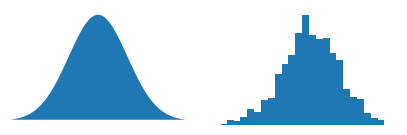

In [3]:
np.random.seed(1)
x=np.linspace(-3,3,300)
xs=stats.norm.rvs(size=1000)
f,axes=plt.subplots(ncols=2,figsize=(5,1.5))
ax = axes[0]
ax.fill(x,stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax = axes[1]
ax.hist(xs, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
plt.show()

## Sampling Distribution of a Statistic

In [4]:
loans_income=pd.read_csv(r'G:\data_science\data\loans_income.csv').squeeze('columns')
sample_data=pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data',
})
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
40292,63000.0,Data
38959,92000.0,Data
17361,134000.0,Data
33996,52000.0,Data
26491,43000.0,Data


g:\data_science\DS\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


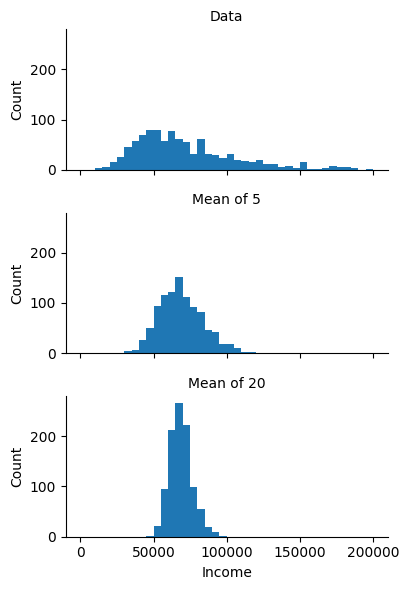

In [5]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

# The Bootstrap

In [6]:
results=[]
for i in range(1000):
    sample=resample(loans_income)
    results.append(sample.median())
results=pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'Sample : {results.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')



Bootstrap Statistics:
original: 62000.0
Sample : 62000.0
bias: -82.09799999999814
std. error: 228.73933106830927


68760.51844
55734.1


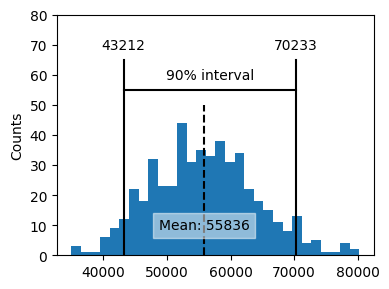

In [7]:
print(loans_income.mean())
np.random.seed(seed=3)
sample20=resample(loans_income,n_samples=20, replace=False)
print(sample20.mean())
results=[]
for i in range(500):
    sample=resample(sample20)
    results.append(sample.mean())
results=pd.Series(results)
confidence_interval=list(results.quantile([0.05,0.95]))
# print(confidence_interval)
ax=results.plot.hist(bins=30,figsize=(4,3))
ax.plot(confidence_interval,[55,55], color='black')
for x  in confidence_interval:
    ax.plot([x,x],[0,65],color='black')
    ax.text(x,70,f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')
meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()


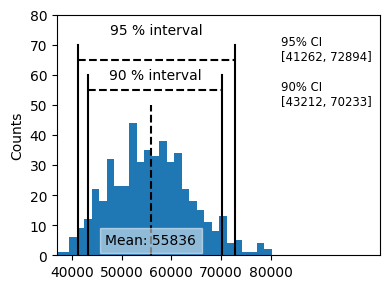

In [8]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
ax.text(sum(confidence_interval) / 2, 60, '90 % interval',horizontalalignment='center', verticalalignment='center')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
ax.text(sum(confidence_interval) / 2, 75, '95 % interval',horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

# Normal distribution

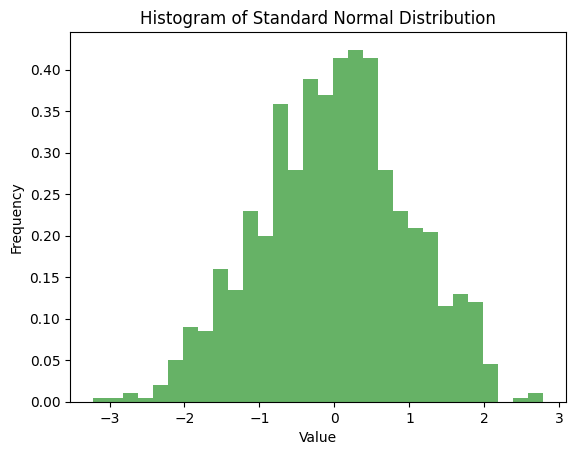

In [10]:
# Generate random samples from standard normal distribution
num_samples = 1000
standard_normal_samples = np.random.randn(num_samples)

# Plot histogram to visualize the distribution
plt.hist(standard_normal_samples, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


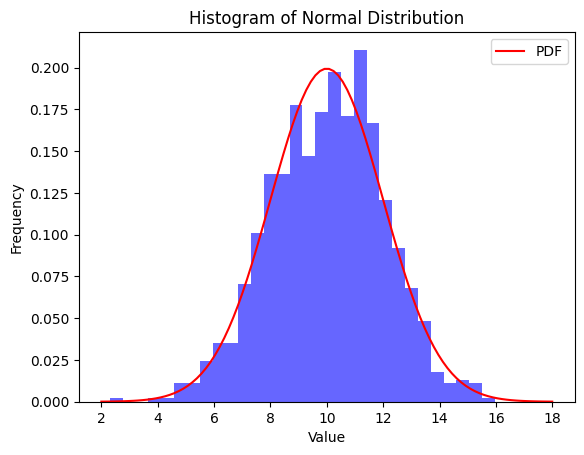

In [11]:
mean = 10
std_dev = 2

# Generate random samples from the normal distribution
num_samples = 1000
normal_samples = np.random.normal(mean, std_dev, num_samples)

# Plot histogram to visualize the distribution
plt.hist(normal_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title('Histogram of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the theoretical probability density function (PDF)
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r', label='PDF')
plt.legend()
plt.show()